In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

In [2]:
E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2))
H = E.astype(complex)

t = np.linspace(0, 10, 1000) #Simulação de 10 segundos

A = np.exp(-(complex(0,1))*np.pi*t/2)
B = np.exp(-3*(complex(0,1))*np.pi*t/2)

I = [[1, 0], [0, 1]]
R = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]

print(np.dot(complex(0,1),I))

[[0.+1.j 0.+0.j]
 [0.+0.j 0.+1.j]]


In [3]:
# Euler: (\psi(t+delta(t))-\psi(t))/delta t

"""
\psi_(k+1) = (1 - delta t * i * H ) \psi_k com H definido por resposta analitica.ipynb
"""

Psi_k = np.zeros((2,1))
Psi_0 = [[0.80],[0.60]]

deltaT = 0.000001

Psi_k = np.matmul((I - deltaT*np.dot(complex(0,1),H)),Psi_0)

print(Psi_k)

[[array([0.8       -8.00000000e-07j, 0.79999999-7.99901108e-07j,
         0.79999997-7.99604458e-07j, 0.79999996-7.99110121e-07j,
         0.79999995-7.98418222e-07j, 0.79999994-7.97528930e-07j,
         0.79999992-7.96442465e-07j, 0.79999991-7.95159097e-07j,
         0.7999999 -7.93679142e-07j, 0.79999989-7.92002967e-07j,
         0.79999987-7.90130985e-07j, 0.79999986-7.88063660e-07j,
         0.79999985-7.85801502e-07j, 0.79999984-7.83345071e-07j,
         0.79999983-7.80694974e-07j, 0.79999981-7.77851867e-07j,
         0.7999998 -7.74816452e-07j, 0.79999979-7.71589480e-07j,
         0.79999978-7.68171748e-07j, 0.79999976-7.64564102e-07j,
         0.79999975-7.60767433e-07j, 0.79999974-7.56782680e-07j,
         0.79999973-7.52610829e-07j, 0.79999972-7.48252910e-07j,
         0.79999971-7.43710001e-07j, 0.79999969-7.38983225e-07j,
         0.79999968-7.34073751e-07j, 0.79999967-7.28982792e-07j,
         0.79999966-7.23711608e-07j, 0.79999965-7.18261501e-07j,
         0.79999964-7.126

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [4]:
Psi_0 = [[complex(0.80,0)],[complex(0.60,0)]]
t = 0
Psi_real = np.zeros((2,1000))
Psi_imag = Psi_real.astype(complex)
Psi_real[0][t]= 0.80
Psi_real[1][t]= 0.60
Psi_imag[0][t]= complex(0,0)
Psi_imag[1][t]= complex(0,0)
while t < 10 :
    
    
    E = np.zeros((2,2))
    I = np.zeros((2,2))
    R = np.zeros((2,2))
    H = E.astype(complex)

    A = (1/2*np.pi)
    B = (3/2*np.pi)

    I = [[1, 0], [0, 1]]
    R = [[1, 0], [0, 1]]
    H = [[A, 0], [0, B]]
    
    Psi_k = np.zeros((2,1))
    
    deltaT = 0.01
    Psi_k = np.matmul((I - np.dot(deltaT,np.dot(complex(0,1),H))),Psi_0)

    print(Psi_k)
    Psi_0 = Psi_k
    
    Psi_real[0][int(t*100)]= Psi_0[0].real
    Psi_real[1][int(t*100)]= Psi_0[1].real
    Psi_imag[0][int(t*100)]= Psi_0[0].imag
    Psi_imag[1][int(t*100)]= Psi_0[1].imag
    t = t + 0.01
    print("-------------")
    

[[0.8-0.01256637j]
 [0.6-0.02827433j]]
-------------
[[0.79980261-0.02513274j]
 [0.5986676 -0.05654867j]]
-------------
[[0.79940782-0.03769601j]
 [0.59600281-0.08476021j]]
-------------
[[0.7988157 -0.05025308j]
 [0.59200858-0.11284618j]]
-------------
[[0.79802632-0.06280085j]
 [0.58669083-0.14074393j]]
-------------
[[0.79703985-0.07533622j]
 [0.58005843-0.16839109j]]
-------------
[[0.79585647-0.08785609j]
 [0.57212318-0.1957257j ]]
-------------
[[0.79447643-0.10035737j]
 [0.56289983-0.22268636j]]
-------------
[[0.79290002-0.11283698j]
 [0.55240598-0.24921239j]]
-------------
[[0.79112758-0.12529182j]
 [0.54066212-0.27524391j]]
-------------
[[0.7891595 -0.13771883j]
 [0.52769156-0.30072202j]]
-------------
[[0.78699622-0.15011492j]
 [0.51352037-0.32558889j]]
-------------
[[0.78463822-0.16247702j]
 [0.49817735-0.34978797j]]
-------------
[[0.78208604-0.17480209j]
 [0.48169398-0.37326403j]]
-------------
[[0.77934025-0.18708707j]
 [0.46410433-0.39596332j]]
-------------
[[0.77640

[[-0.37074505+0.7861014j ]
 [ 1.23156771-0.28565983j]]
-------------
[[-0.358397  +0.79192505j]
 [ 1.21810631-0.34369609j]]
-------------
[[-0.34595747+0.79755474j]
 [ 1.20191001-0.401098j  ]]
-------------
[[-0.33342951+0.80298902j]
 [ 1.18300872-0.45773667j]]
-------------
[[-0.32081619+0.80822652j]
 [ 1.16143838-0.51348464j]]
-------------
[[-0.3081206 +0.81326589j]
 [ 1.13724099-0.56821614j]]
-------------
[[-0.29534584+0.81810584j]
 [ 1.11046443-0.62180736j]]
-------------
[[-0.28249507+0.82274512j]
 [ 1.08116245-0.67413676j]]
-------------
[[-0.26957142+0.82718254j]
 [ 1.04939451-0.72508534j]]
-------------
[[-0.25657807+0.83141696j]
 [ 1.01522567-0.77453689j]]
-------------
[[-0.2435182 +0.83544728j]
 [ 0.97872647-0.82237827j]]
-------------
[[-0.23039502+0.83927245j]
 [ 0.93997281-0.86849967j]]
-------------
[[-0.21721176+0.84289149j]
 [ 0.89904573-0.91279485j]]
-------------
[[-0.20397165+0.84630344j]
 [ 0.85603128-0.95516138j]]
-------------
[[-0.19067795+0.84950742j]
 [ 0.81

[[-0.87812675-0.21200164j]
 [-1.31968055-1.20782442j]]
-------------
[[-0.88145687-0.19820805j]
 [-1.37659793-1.14563594j]]
-------------
[[-0.88457031-0.18436216j]
 [-1.43058476-1.08076529j]]
-------------
[[-0.88746627-0.17046736j]
 [-1.48151462-1.01335057j]]
-------------
[[-0.89014396-0.15652708j]
 [-1.52926764-0.94353584j]]
-------------
[[-0.89260268-0.14254473j]
 [-1.57373072-0.8714708j ]]
-------------
[[-0.89484177-0.12852376j]
 [-1.61479781-0.79731049j]]
-------------
[[-0.89686062-0.11446761j]
 [-1.65237019-0.72121493j]]
-------------
[[-0.89865867-0.10037976j]
 [-1.68635664-0.64334882j]]
-------------
[[-0.90023543-0.08626366j]
 [-1.71667374-0.56388114j]]
-------------
[[-0.90159046-0.0721228j]
 [-1.74324601-0.4829848j]]
-------------
[[-0.90272336-0.05796065j]
 [-1.76600613-0.40083626j]]
-------------
[[-0.9036338-0.0437807j ]
 [-1.7848951-0.31761518j]]
-------------
[[-0.90432151-0.02958646j]
 [-1.79986236-0.23350398j]]
-------------
[[-0.90478625-0.01538141j]
 [-1.810865

/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


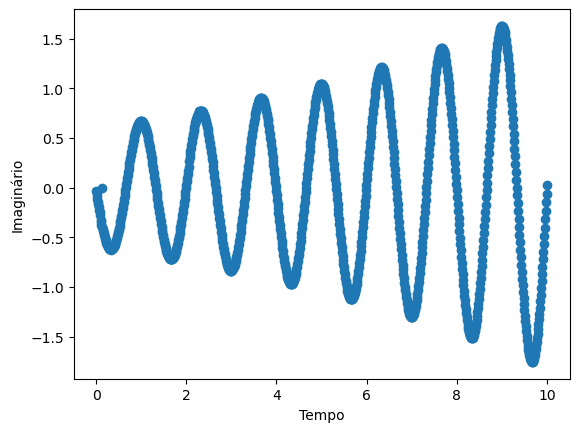

In [5]:
ts = np.linspace(0, 10, 1000) #Simulação de 10 segundos

x = [ele for ele in Psi_real[1]] 
y = [ele for ele in Psi_imag[1]] 

plt.scatter(ts, y) 
plt.ylabel('Imaginário') 
plt.xlabel('Tempo') 
plt.show()

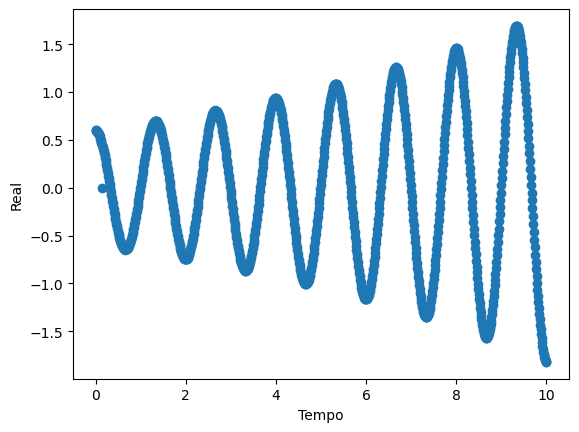

In [6]:
ts = np.linspace(0, 10, 1000) #Simulação de 10 segundos

x = [ele for ele in Psi_real[1]] 
y = [ele for ele in Psi_imag[1]] 

plt.scatter(ts, x) 
plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.show()

In [7]:
P = np.zeros((2,1000))
S = P.astype(complex)

def dpsidt(t,psi, H):
    return -1*np.matmul(np.dot(complex(0,1),H),psi)

def rungeKutta(t0, psi0, t, h, H):
    
    n = (int)((t-t0)/h)
    
    for i in range(1, n + 1):
        
        S[0][i-1] = psi0[0][0]
        S[1][i-1] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, psi0 + np.dot((0.5*h), k1), H)
        k3 = dpsidt(t0 + 0.5 * h, psi0 + np.dot((0.5*h), k2), H)
        k4 = dpsidt(t0 + h, psi0 + np.dot(h, k3), H)
 
        psi0 = psi0 + (h / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    
        t0 = t0 + h
        
    return S

In [8]:
tt = 10
t = 0

h = 0.01

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2))
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
R = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]

Z = rungeKutta(t, psi0, tt, h, H)

In [9]:
print(Z)

[[ 0.8       +0.j          0.79990131-0.01256585j  0.79960525-0.02512861j
  ... -0.7991119 -0.03768517j -0.79960525-0.02512861j
  -0.79990131-0.01256586j]
 [ 0.6       +0.j          0.59933392-0.02826387j  0.59733718-0.05646499j
  ... -0.59401399-0.08454188j -0.59733702-0.05646614j
  -0.59933382-0.02826503j]]


In [10]:
len(Z)

2

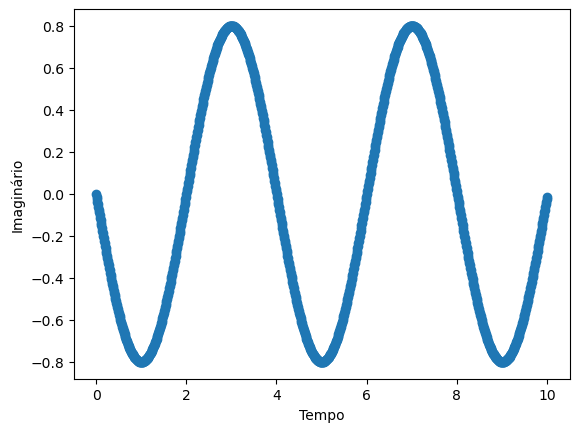

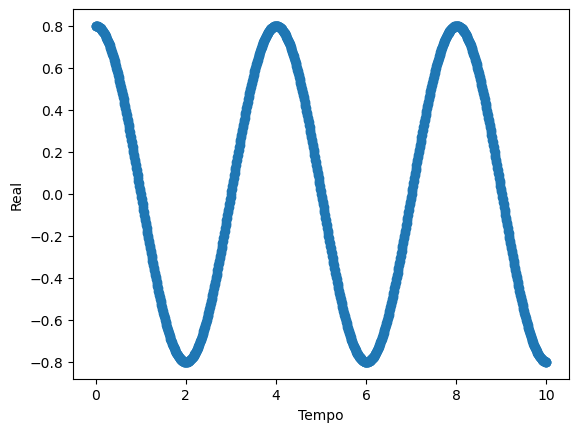

In [11]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Z[0]] 
y = [ele.imag for ele in Z[0]] 
plt.scatter(ts, y) 
plt.ylabel('Imaginário') 
plt.xlabel('Tempo') 
plt.savefig('rk_imag0.png', format='png')
plt.show()

plt.scatter(ts, x) 
plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.savefig('rk_real0.png', format='png')
plt.show()

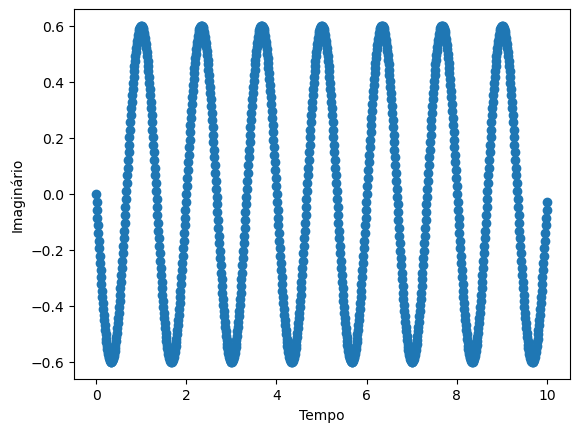

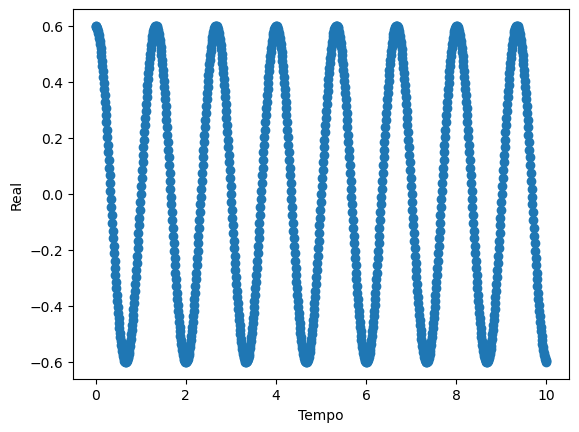

In [12]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Z[1]] 
y = [ele.imag for ele in Z[1]] 
plt.scatter(ts, y) 
plt.ylabel('Imaginário') 
plt.xlabel('Tempo') 
plt.savefig('rk_imag1.png', format='png')
plt.show()

plt.scatter(ts, x) 
plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.savefig('rk_real1.png', format='png')
plt.show()